### TRABAJO FINAL

In [45]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [46]:
# load data
df = pd.read_csv('clientes_final_8.csv', sep = ';')
df.head()

C:\Users\Leo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IDSexo,ActividadAFIP,FechaNacimiento,IDEstadoCivil,pais_nacimiento,nacionidad,situacion_laboral,Situacion_Vivienda,pais_domicilio,ciudad_domicilio,...,Pf Bonos,CANTIDAD_CUOTAPARTISTA,CANTIDAD_COMITENTES,Segmento_renta,TC_Perf_cargo_anual,TC_Perf_Comisiones,gasto_anual_tc,ingreso_anual,TC_Perf_int_saldofinan,TC_Perf_Saldo_No_Financ
0,F,0.0,1932-02-03 02:00:00.000,S,ARGENTINA,ARGENTINO,Relacion de dependencia contratado,PROPIA,ARGENTINA,CORDOBA,...,NaN,NaN,NaN,MEDIA,659.0,47007.96,3627475.80,362880.0,226.56,52275.00
1,F,0.0,1934-09-21 02:00:00.000,S,ARGENTINA,ARGENTINO,Relacion de dependencia contratado,PROPIA,ARGENTINA,SANTIAGO DEL ESTERO,...,NaN,NaN,NaN,BAJA,1664.5,32408.76,400733.28,49524.0,10.26,20124.00
2,F,0.0,1934-09-29 02:00:00.000,V,ARGENTINA,ARGENTINO,Relacion de dependencia contratado,PROPIA,ARGENTINA,GODOY CRUZ,...,NaN,NaN,NaN,BAJA,659.0,27601.44,2631941.16,362880.0,680.66,124800.00
3,F,0.0,1935-02-24 02:00:00.000,V,ARGENTINA,ARGENTINO,Relacion de dependencia contratado,PROPIA,ARGENTINA,SAN MIGUEL DE TUCUMAN,...,NaN,NaN,NaN,BAJA,659.0,30196.08,1794501.72,362880.0,0.00,180507.60
4,F,0.0,1935-07-17 02:00:00.000,V,ARGENTINA,ARGENTINO,Relacion de dependencia fijo,PROPIA,ARGENTINA,CORRIENTES,...,NaN,NaN,NaN,BAJA,1607.0,43225.08,2782645.80,21600.0,7703.76,20797.44


In [47]:
df.shape

(332218, 47)

In [48]:
df['Segmento_renta'].value_counts(normalize = True)

BAJA         0.448384
MEDIA        0.431929
ALTA         0.103614
SIN RENTA    0.016074
Name: Segmento_renta, dtype: float64

In [49]:
df['sit_bcra'].value_counts(normalize = True)

1     0.847606
2     0.051517
4     0.034447
5     0.034387
3     0.031768
11    0.000274
Name: sit_bcra, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332218 entries, 0 to 332217
Data columns (total 47 columns):
IDSexo                              332218 non-null object
ActividadAFIP                       332202 non-null float64
FechaNacimiento                     332218 non-null object
IDEstadoCivil                       332216 non-null object
pais_nacimiento                     332218 non-null object
nacionidad                          332218 non-null object
situacion_laboral                   332218 non-null object
Situacion_Vivienda                  332218 non-null object
pais_domicilio                      332218 non-null object
ciudad_domicilio                    332218 non-null object
provincia_domicilio                 332218 non-null object
sit_bcra                            332218 non-null int64
vb_antiguedad_tc                    332218 non-null int64
vb_actividad_tc                     332218 non-null int64
vb_uso_tc_prom_3                    332218 non-null int64
uso_can

In [51]:
# show categories in object variables
for i in df.columns:
    if df[i].dtype == 'O':
        print(i)
        print(df[i].value_counts(normalize = True))

IDSexo
M    0.55568
F    0.44432
Name: IDSexo, dtype: float64
FechaNacimiento
1977-01-12 02:00:00.000    0.000138
1977-12-29 02:00:00.000    0.000132
1978-10-02 02:00:00.000    0.000132
1976-03-01 02:00:00.000    0.000129
1978-02-27 02:00:00.000    0.000129
1979-02-09 02:00:00.000    0.000129
1976-03-06 02:00:00.000    0.000126
1977-03-23 02:00:00.000    0.000123
1979-11-10 02:00:00.000    0.000120
1978-08-31 02:00:00.000    0.000120
1975-09-16 02:00:00.000    0.000117
1982-01-15 02:00:00.000    0.000117
1975-06-24 02:00:00.000    0.000117
1978-10-10 02:00:00.000    0.000117
1978-01-10 02:00:00.000    0.000117
1981-04-21 02:00:00.000    0.000117
1976-12-20 02:00:00.000    0.000117
1975-12-12 02:00:00.000    0.000117
1975-12-30 02:00:00.000    0.000114
1977-02-14 02:00:00.000    0.000114
1977-10-18 02:00:00.000    0.000114
1979-01-29 02:00:00.000    0.000114
1978-02-20 02:00:00.000    0.000114
1980-03-05 02:00:00.000    0.000114
1976-12-26 02:00:00.000    0.000111
1979-09-27 02:00:00.00

0,00          0.972626
100000,00     0.000647
50000,00      0.000569
10000,00      0.000458
200000,00     0.000418
30000,00      0.000409
20000,00      0.000406
40000,00      0.000346
60000,00      0.000295
150000,00     0.000265
15000,00      0.000265
70000,00      0.000238
80000,00      0.000232
300000,00     0.000229
25000,00      0.000229
5000,00       0.000226
1000,00       0.000217
90000,00      0.000196
2000,00       0.000175
250000,00     0.000169
35000,00      0.000166
400000,00     0.000166
110000,00     0.000151
120000,00     0.000147
500000,00     0.000135
45000,00      0.000126
130000,00     0.000123
55000,00      0.000120
180000,00     0.000117
12000,00      0.000114
                ...   
1419240,95    0.000003
50100,00      0.000003
1732126,23    0.000003
1096000,00    0.000003
530905,89     0.000003
67127,00      0.000003
309000,00     0.000003
300600,00     0.000003
191483,18     0.000003
192094,24     0.000003
864000,00     0.000003
573747,61     0.000003
129778,06  

In [52]:
df.describe()

,ActividadAFIP,sit_bcra,vb_antiguedad_tc,vb_actividad_tc,vb_uso_tc_prom_3,uso_canales_digitales,id_Cobis,SUM_CA_Pesos_SD_Primer_Dia_Mes,SUM_CA_Pesos_SD_Promedio_Mensual,SUM_CA_Pesos_SD_Ultimo_Dia_Mes,...,FCI_PESOS,Pf Bonos,CANTIDAD_CUOTAPARTISTA,CANTIDAD_COMITENTES,TC_Perf_cargo_anual,TC_Perf_Comisiones,gasto_anual_tc,ingreso_anual,TC_Perf_int_saldofinan,TC_Perf_Saldo_No_Financ
count,332202.000000,332218.000000,332218.000000,332218.000000,3.322180e+05,332218.000000,3.322180e+05,3.322180e+05,3.322180e+05,3.322180e+05,...,0.0,748.0,2688.000000,2647.000000,332218.000000,332218.000000,3.322180e+05,3.301900e+05,332218.000000,3.322180e+05
mean,314650.658903,1.358683,131.039706,2.531362,1.822899e+04,0.746269,4.370706e+06,5.060221e+03,3.846532e+03,4.211211e+03,...,NaN,0.0,1.045015,1.023045,494.106358,27350.700123,1.937492e+06,7.792393e+05,1465.092994,1.890136e+05
std,372246.068644,0.968272,71.462438,20.870141,3.864792e+04,0.435146,1.990891e+06,3.093108e+04,2.176486e+04,2.759073e+04,...,NaN,0.0,0.231139,0.150075,547.034044,17251.916325,1.907691e+06,2.008266e+08,2870.436760,3.383529e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,7.250000e+02,-4.576400e+03,-5.665670e+03,-5.914800e+03,...,NaN,0.0,1.000000,1.000000,-2733.340000,-28420.680000,-2.352657e+06,0.000000e+00,0.000000,-6.600000e+03
25%,0.000000,1.000000,81.000000,1.000000,0.000000e+00,0.000000,2.873754e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,0.0,1.000000,1.000000,0.000000,16774.590000,6.412167e+05,1.440000e+05,25.480000,1.200000e+04
50%,0.000000,1.000000,132.000000,2.000000,6.779000e+03,1.000000,4.948296e+06,0.000000e+00,6.800000e-01,0.000000e+00,...,NaN,0.0,1.000000,1.000000,516.000000,26622.120000,1.491267e+06,2.568000e+05,230.035000,6.772800e+04
75%,691001.000000,1.000000,167.000000,2.000000,2.091900e+04,1.000000,6.034362e+06,4.393575e+02,1.247793e+03,2.920025e+02,...,NaN,0.0,1.000000,1.000000,762.000000,36086.760000,2.655541e+06,3.628800e+05,1449.870000,2.231664e+05
max,990000.000000,11.000000,491.000000,999.000000,3.837546e+06,1.000000,6.923741e+06,5.147295e+06,1.902228e+06,3.275078e+06,...,NaN,0.0,3.000000,2.000000,4037.500000,523633.560000,5.136193e+07,1.080000e+11,66698.520000,1.397517e+07


In [53]:
# Fix comma-dot problem in 3 variables
df['monto_pf_dolar'] = df['monto_pf_dolar'].str.replace(',','.', regex = True)
df['monto_pf_pesos'] = df['monto_pf_pesos'].str.replace(',','.', regex = True)
df['SUM_CA_Promo_Consumo'] = df['SUM_CA_Promo_Consumo'].str.replace(',','.', regex = True)

In [54]:
df['monto_pf_dolar'] = pd.to_numeric(df['monto_pf_dolar'])
df['monto_pf_dolar'].dtype

dtype('float64')

In [55]:
df['monto_pf_pesos'] = pd.to_numeric(df['monto_pf_pesos'])
df['monto_pf_pesos'].dtype

dtype('float64')

In [56]:
df['SUM_CA_Promo_Consumo'] = pd.to_numeric(df['SUM_CA_Promo_Consumo'])
df['SUM_CA_Promo_Consumo'].dtype

dtype('float64')

In [57]:
# fix column name
df.rename(columns = {'nacionidad':'nacionalidad'}, inplace = True)

In [58]:
df['FechaNacimiento'].head()

0    1932-02-03 02:00:00.000
1    1934-09-21 02:00:00.000
2    1934-09-29 02:00:00.000
3    1935-02-24 02:00:00.000
4    1935-07-17 02:00:00.000
Name: FechaNacimiento, dtype: object

In [59]:
# create age variable
df['edad'] = pd.to_datetime('today').year - pd.to_datetime(df['FechaNacimiento']).dt.year
df[['edad', 'FechaNacimiento']].head(10)

,edad,FechaNacimiento
0,87,1932-02-03 02:00:00.000
1,85,1934-09-21 02:00:00.000
2,85,1934-09-29 02:00:00.000
3,84,1935-02-24 02:00:00.000
4,84,1935-07-17 02:00:00.000
5,84,1935-08-20 02:00:00.000
6,84,1935-10-24 00:00:00.000
7,84,1935-12-25 00:00:00.000
8,83,1936-01-10 02:00:00.000
9,83,1936-01-11 02:00:00.000


In [60]:
# drop birthdate variable
df.drop(columns = ['FechaNacimiento', 'id_Cobis'], inplace = True)

In [61]:
# clean bcra variable
df = df.loc[(df['sit_bcra'] != 11) & (df['sit_bcra'] != 6)]

In [62]:
# choose latam countries
df = df.loc[(df['pais_nacimiento'] == 'ARGENTINA') | (df['pais_nacimiento'] == 'PARAGUAY') | 
           (df['pais_nacimiento'] == 'CHILE') | (df['pais_nacimiento'] == 'PERU') |
           (df['pais_nacimiento'] == 'BOLIVIA') | (df['pais_nacimiento'] == 'URUGUAY')]

In [63]:
df = df.loc[df['SUM_CA_Pesos_SD_Primer_Dia_Mes'] > 0]

In [64]:
df.drop(columns = ['Acciones', 'FCI_DOLAR', 'FCI_PESOS', 'Pf Bonos', 'CANTIDAD_CUOTAPARTISTA', 'CANTIDAD_COMITENTES'], inplace = True)

In [65]:
df = df.loc[df['ingreso_anual'] > 0]
df = df.loc[df['gasto_anual_tc'] > 0]

In [66]:
df = df.loc[df['ingreso_anual'] < 150000000]

In [67]:
# duplicates elimination
df.drop_duplicates(inplace = True)
len(df)

157383

In [68]:
# NaNs elimination
df.dropna(inplace = True)
len(df)

129811

In [69]:
# random sample of 150K instances
# df = df.sample(150000, random_state=16)

In [70]:
df.rename(columns = {'Situacion_Vivienda':'situacion_vivienda'}, inplace = True)
df.rename(columns = {'IDEstadoCivil':'estado_civil'}, inplace = True)

### Data analysis

In [71]:
import seaborn as sns

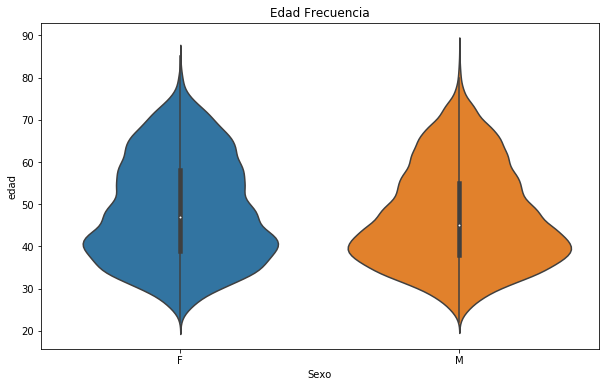

In [72]:
plt.figure(figsize=(10,6))
plt.title("Edad Frecuencia")
sns.axes_style("dark")
sns.violinplot(y=df["edad"], x = df['IDSexo'])
plt.xlabel('Sexo')
plt.show()

In [73]:
df.loc[np.abs(df['ingreso_anual']-df['ingreso_anual'].mean()) >=(3*df['ingreso_anual'].std()),'ingreso_anual']=np.nan
df.dropna(inplace=True)
len(df)

129594

In [74]:
df.loc[np.abs(df['gasto_anual_tc']-df['gasto_anual_tc'].mean()) >=(3*df['gasto_anual_tc'].std()),'gasto_anual_tc']=np.nan
df.dropna(inplace=True)
len(df)

127316

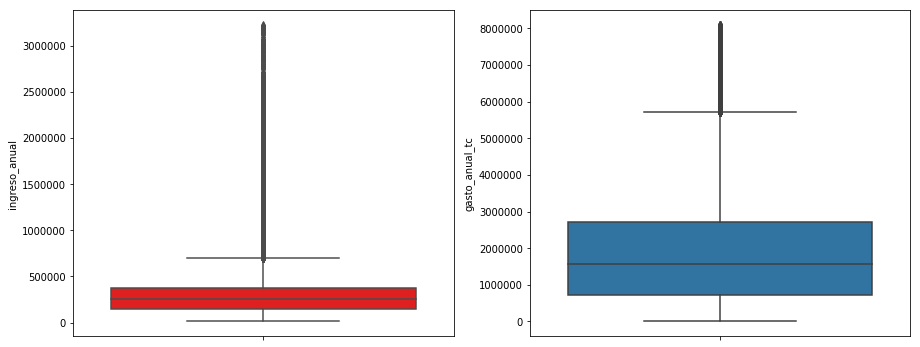

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['ingreso_anual'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['gasto_anual_tc'])
plt.show()

Text(0.5, 0, 'Ingreso reportado / Gasto tarjeta de crédito')

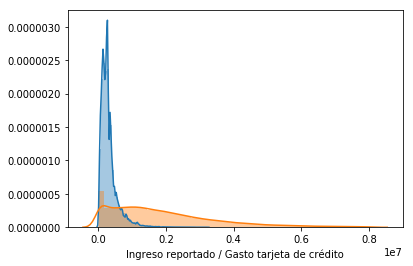

In [76]:
plot_income = sns.distplot(df['ingreso_anual'])
plot_spend = sns.distplot(df['gasto_anual_tc'])
plt.xlabel('Ingreso reportado / Gasto tarjeta de crédito')

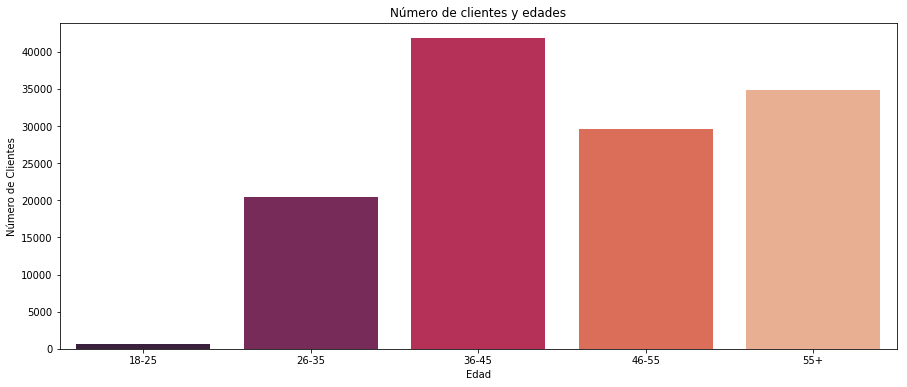

In [77]:
edad18_25 = df.edad[(df.edad <= 25) & (df.edad >= 18)]
edad26_35 = df.edad[(df.edad <= 35) & (df.edad >= 26)]
edad36_45 = df.edad[(df.edad <= 45) & (df.edad >= 36)]
edad46_55 = df.edad[(df.edad <= 55) & (df.edad >= 46)]
edad55mas = df.edad[df.edad >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(edad18_25.values),len(edad26_35.values),len(edad36_45.values),len(edad46_55.values),len(edad55mas.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Número de clientes y edades")
plt.xlabel("Edad")
plt.ylabel("Número de Clientes")
plt.show()

In [78]:
df['gasto_anual_tc'].dtype

dtype('float64')

### Modelo ingreso - gasto

In [79]:
scaler = StandardScaler()
df_scaled = df[['ingreso_anual', 'gasto_anual_tc']]

In [80]:
df_scaled = scaler.fit_transform(df_scaled)

**Within Cluster Sum Of Squares (WCSS)**

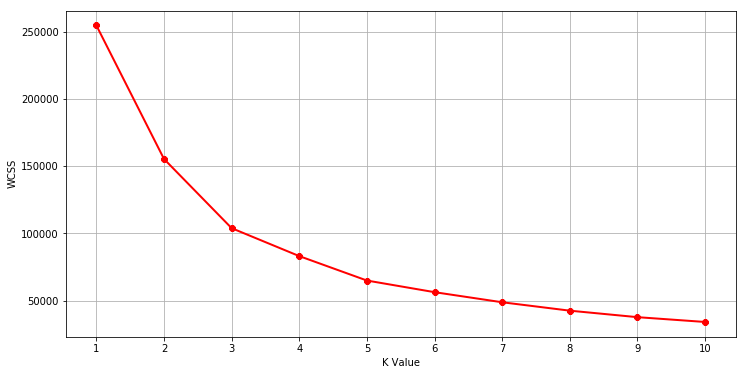

In [81]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [82]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(df_scaled)

In [83]:
y_kmeans

array([3, 1, 1, ..., 1, 2, 0])

In [84]:
kmeansmodel.cluster_centers_

array([[-0.14859133,  0.36569955],
       [-0.33613503, -0.7447301 ],
       [ 0.21852108,  2.05668094],
       [ 2.66645687,  0.36440596]])

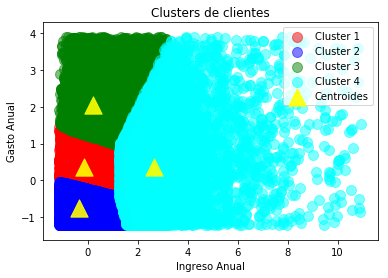

In [85]:
#Visualizing all the clusters 

plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides',
            marker = '^', alpha = 0.9)
plt.title('Clusters de clientes')
plt.xlabel('Ingreso Anual')
plt.ylabel('Gasto Anual')
plt.legend(loc = 'best')
plt.show()

In [86]:
labels = kmeansmodel.labels_
centroids = kmeansmodel.cluster_centers_

In [87]:
import sklearn.metrics as sm
sm.silhouette_score(df_scaled, labels, metric='euclidean')

0.3741720128834727

In [88]:
sm.calinski_harabasz_score(df_scaled, labels)

87505.27389316414

In [89]:
from sklearn import cluster
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette = sm.silhouette_score(df_scaled, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(df_scaled, labels)      
    evaluation = [(k, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.48793869095580766, 81355.0116627578)]
K=  [(3, 0.47051756263284117, 92316.03438866322)]
K=  [(4, 0.3741720128834727, 87505.27389316414)]
K=  [(5, 0.399110571160555, 92858.44474585698)]
K=  [(6, 0.3716484956527684, 89601.56950194026)]
K=  [(7, 0.3531630781542863, 89390.79738914786)]
K=  [(8, 0.35237531715065296, 90528.90537577623)]


### Modelo edad - gasto 

In [90]:
scaler = StandardScaler()
df_scaled = df[['edad', 'gasto_anual_tc']]

In [91]:
df_scaled = scaler.fit_transform(df_scaled)

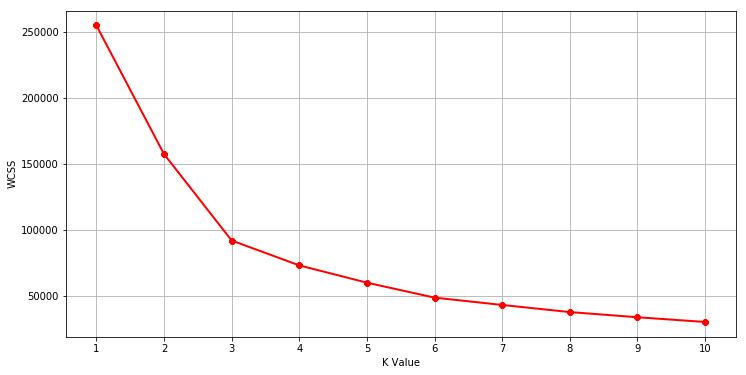

In [92]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [93]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(df_scaled)

In [94]:
y_kmeans

array([2, 2, 2, ..., 0, 1, 0])

In [95]:
kmeansmodel.cluster_centers_

array([[-0.73047484, -0.46340179],
       [ 0.0598968 ,  1.58192309],
       [ 1.11290557, -0.28327588]])

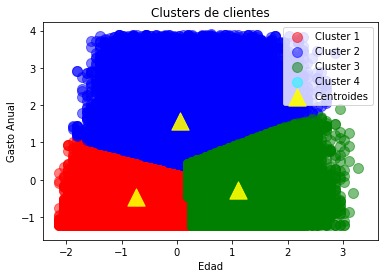

In [96]:
#Visualizing all the clusters 

plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides',
            marker = '^', alpha = 0.9)
plt.title('Clusters de clientes')
plt.xlabel('Edad')
plt.ylabel('Gasto Anual')
plt.legend(loc = 'best')
plt.show()

In [97]:
labels = kmeansmodel.labels_
centroids = kmeansmodel.cluster_centers_

In [98]:
import sklearn.metrics as sm
sm.silhouette_score(df_scaled, labels, metric='euclidean')

0.4329248312414715

In [99]:
sm.calinski_harabasz_score(df_scaled, labels)

112141.17825088232

In [100]:
from sklearn import cluster
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette = sm.silhouette_score(df_scaled, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(df_scaled, labels)      
    evaluation = [(k, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.3811789300012075, 78542.57241341966)]
K=  [(3, 0.4329248312414715, 112141.17825088232)]
K=  [(4, 0.38573544103447294, 104735.5576822736)]
K=  [(5, 0.3545461302475396, 102432.41471206969)]
K=  [(6, 0.366236723380443, 106665.20512776698)]
K=  [(7, 0.35077012173683, 102882.39982097749)]
K=  [(8, 0.3528404009245065, 103148.77212773706)]


### Clustering jerárquico

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

In [34]:
scaler = StandardScaler()
df_scaled = df[['gasto_anual_tc', 'ingreso_anual']]

In [35]:
df_scaled = scaler.fit_transform(df_scaled)

In [36]:
df_scaled = pd.DataFrame(df_scaled).sample(10000)

In [37]:
df_scaled.shape

(10000, 2)

In [38]:
# creación de clusters
Z = linkage(df_scaled, method = 'complete')

In [39]:
# Calculamos las distancias con la función pdist(X) que importamos de scipy:

pdist(df_scaled)

array([0.33363804, 4.25265636, 3.22611743, ..., 0.89649413, 0.20479979,
       0.6953137 ])

In [40]:
pdist(df_scaled).shape

(49995000,)

In [41]:
# Coeficiente cophenético
c, coph_dists = cophenet(Z, pdist(df_scaled))
c

0.723208380320122

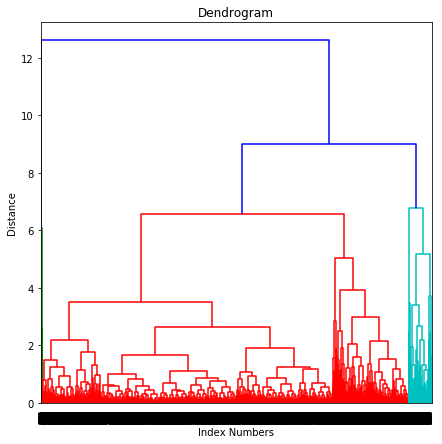

In [42]:
# Dendograma
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.
)
plt.show()

#### Evaluando métodos de clustering

In [43]:
def eval_clusters_linkage(df_scaled, link_method):
    L = linkage(df_scaled, link_method)
    c, coph_dists = cophenet(L, pdist(df_scaled))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

ward 0.5165548633042142
single 0.805445793166069
average 0.8275505555518657
complete 0.723208380320122


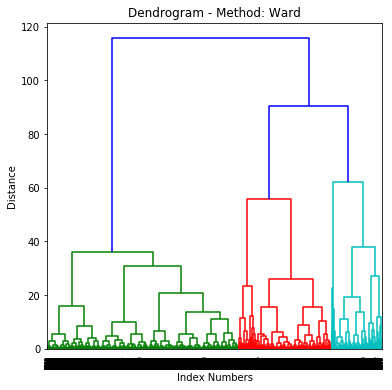

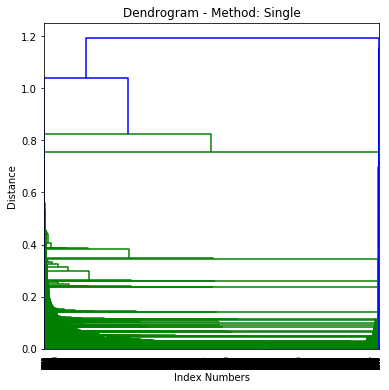

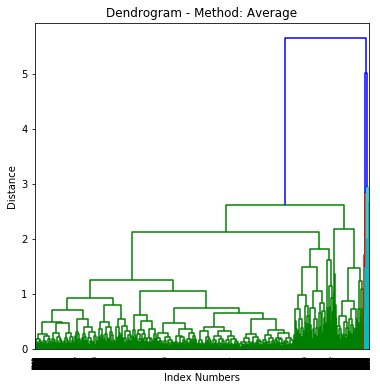

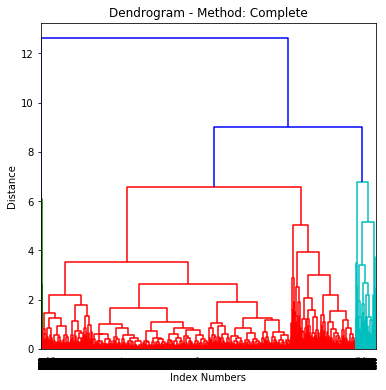

In [44]:
for i in ['ward','single','average','complete']:
    eval_clusters_linkage(df_scaled, i)

### PCA

In [ ]:
df_PCA = df.copy()
df_PCA = df.loc[:, ['vb_antiguedad_tc', 'vb_actividad_tc','SUM_CA_Pesos_SD_Promedio_Mensual'
                    , 'TC_limite_Compra', 'ea_perfil_patrimonial', 'monto_pf_pesos',
                   'monto_pf_dolar']]
df_PCA = df_PCA.reset_index(drop=True)
df_PCA.info()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
scaler.fit(df_PCA)
df_PCA = scaler.transform(df_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=['vb_antiguedad_tc', 'vb_actividad_tc','SUM_CA_Pesos_SD_Promedio_Mensual'
                    , 'TC_limite_Compra', 'ea_perfil_patrimonial', 'monto_pf_pesos',
                   'monto_pf_dolar'])
df_PCA.head()

In [ ]:
# Observamos la media de las variables:
print("Media de las variables: ")
print(df_PCA.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df_PCA.var(axis=0))

In [27]:
from sklearn.decomposition import PCA
PCA = PCA()
PCA.fit(df_PCA)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
print(PCA.components_)

[[ 4.39456759e-01 -1.51988191e-01  4.93586772e-01  5.39087491e-01
   2.12434034e-02  4.65179174e-01  1.80807013e-01]
 [-5.47627947e-01  3.61657253e-01  4.53495671e-01 -3.30935152e-01
  -3.41366237e-02  4.73788419e-01  1.68791259e-01]
 [-1.29952481e-02  1.52638714e-01  8.03124091e-04  4.24629946e-02
   9.86242558e-01 -1.65516038e-02 -4.21954653e-02]
 [-3.12116624e-02 -2.83995723e-01 -1.80443051e-01 -1.42991548e-01
   8.81961645e-02 -6.90992983e-02  9.23478591e-01]
 [-1.30292210e-01 -8.32506832e-01  1.35477759e-01 -3.52314598e-01
   1.33698252e-01  2.20211285e-01 -2.84795160e-01]
 [ 4.40534384e-01  1.79778218e-01 -5.07690406e-01 -3.63791459e-01
   2.74494277e-03  6.18027341e-01 -3.93718838e-02]
 [ 5.42947273e-01  1.29474478e-01  4.91985430e-01 -5.66698431e-01
   6.90691081e-03 -3.51615411e-01  3.95820867e-02]]


In [29]:
PCA_loadings = pd.DataFrame(PCA.components_.T, index=df_PCA.columns,\
                            columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6', 'PC7'])
PCA_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
vb_antiguedad_tc,0.439457,-0.547628,-0.012995,-0.031212,-0.130292,0.440534,0.542947
vb_actividad_tc,-0.151988,0.361657,0.152639,-0.283996,-0.832507,0.179778,0.129474
SUM_CA_Pesos_SD_Promedio_Mensual,0.493587,0.453496,0.000803,-0.180443,0.135478,-0.507690,0.491985
TC_limite_Compra,0.539087,-0.330935,0.042463,-0.142992,-0.352315,-0.363791,-0.566698
ea_perfil_patrimonial,0.021243,-0.034137,0.986243,0.088196,0.133698,0.002745,0.006907
monto_pf_pesos,0.465179,0.473788,-0.016552,-0.069099,0.220211,0.618027,-0.351615
monto_pf_dolar,0.180807,0.168791,-0.042195,0.923479,-0.284795,-0.039372,0.039582


In [30]:
print(PCA.explained_variance_)
print(PCA.explained_variance_ratio_)

[1.36343614 1.19989211 1.00030659 0.98322802 0.96965471 0.77507283
 0.70845626]
[0.19477529 0.17141202 0.14289999 0.14046021 0.13852118 0.11072395
 0.10120736]


In [31]:
df_pca = pd.DataFrame(PCA.fit_transform(df_PCA), columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6', 'PC7'],\
                      index=df_PCA.index)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.695835,0.305105,-0.035659,0.145804,0.313334,0.185126,0.204440
1,-0.934921,1.422579,-0.021687,0.071560,0.628609,-0.669405,-0.303228
2,1.373715,-1.833408,-0.025292,-0.127680,-0.520647,1.062698,1.134281
3,-0.345949,-0.022361,-0.028398,0.092098,0.162604,0.233577,0.227056
4,0.290824,-0.356158,0.030515,-0.092028,-0.274871,-0.325332,-0.603242


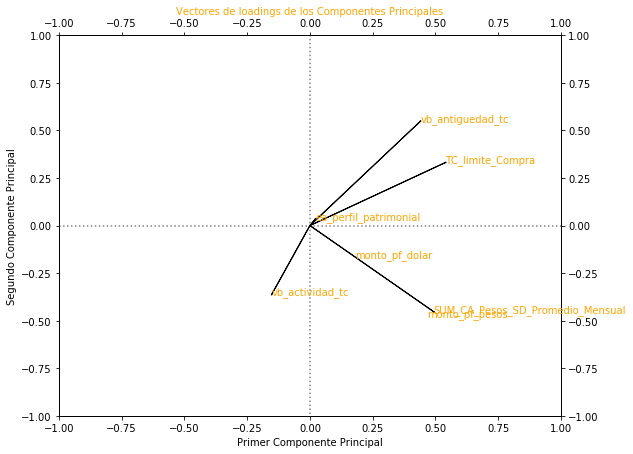

In [32]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# Ploteamos los Componentes Principales 1 y 2
#for i in df_pca.index:
#  ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in PCA_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (PCA_loadings.PC1.loc[i], -PCA_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,PCA_loadings.PC1[0], -PCA_loadings.PC2[0])
ax2.arrow(0,0,PCA_loadings.PC1[1], -PCA_loadings.PC2[1])
ax2.arrow(0,0,PCA_loadings.PC1[2], -PCA_loadings.PC2[2])
ax2.arrow(0,0,PCA_loadings.PC1[3], -PCA_loadings.PC2[3])
ax2.arrow(0,0,PCA_loadings.PC1[4], -PCA_loadings.PC2[4]);

### K means

In [80]:
df_2 = pd.get_dummies(df, columns = ['IDSexo', 'estado_civil',
    'situacion_laboral','situacion_vivienda', 'pais_nacimiento',
       'provincia_domicilio', 'sit_bcra'])


# normalizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df_2)

In [82]:
k = 3

#Como siempre, suele ser una buena práctica fijar la semilla
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=k, random_state=0) 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [83]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [84]:
labels

array([1, 0, 0, ..., 2, 0, 2])

In [85]:
centroids

array([[ 2.20765600e-02, -1.08085792e-02,  5.34208469e-02,
        -3.08004700e-02, -4.43255854e-02, -4.85752023e-02,
        -3.97670681e-02, -3.42875468e-02,  1.58555085e-03,
         1.30492831e-02,  1.27150801e-02,  2.67053281e-02,
        -5.96886606e-02, -5.97265852e-02, -5.13172704e-02,
        -2.80714943e-02, -1.52052044e-02, -6.68262494e-03,
         1.67688145e-03,  1.17853440e-02, -7.92560255e-02,
        -3.44287361e-02,  3.44287361e-02,  2.82297354e-02,
         2.29499110e-03,  1.16503002e-02,  1.16347262e-02,
        -1.06902478e-01, -3.91032086e-01,  3.91032086e-01,
        -2.63895326e-01, -5.57039652e-02, -4.88318520e-01,
        -1.26974315e-01,  6.18370228e-01, -3.03379595e-03,
         4.43542830e-03, -3.27211174e-03,  2.33360431e-03,
         3.02391869e-03,  9.45188578e-04,  2.31823717e-02,
        -4.68959248e-03,  3.57716553e-02,  3.78252399e-02,
        -8.40547661e-03, -6.89639007e-02,  1.28639049e-02,
        -1.96045856e-02,  9.67175038e-03, -1.38109929e-0

In [86]:
#distancia de cada observación con los clusters
dist = kmeans.fit_transform(X)
dist

array([[ 8.53165153,  7.25126728,  9.19947838],
       [12.65031348, 13.64736812, 12.83104085],
       [ 5.2213553 ,  6.59952555,  6.21517792],
       ...,
       [ 7.26980765,  8.13055507,  6.89251972],
       [ 6.05859505,  7.27277075,  7.01844715],
       [13.88149881, 14.63936132, 13.26980296]])

In [88]:
import sklearn.metrics as sm
sm.silhouette_score(X, labels, metric='euclidean')

0.07245522392981085

In [89]:
sm.calinski_harabasz_score(X, labels)

4968.384918014745

In [90]:
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette = sm.silhouette_score(X, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(X, labels)      
    evaluation = [(k, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.10079811662668622, 5626.507313774624)]
K=  [(3, 0.07245522392981085, 4968.384918014745)]
K=  [(4, 0.06399395498149227, 4337.338924370446)]
K=  [(5, 0.03768098424262831, 4005.302029000834)]
K=  [(6, 0.04300989410072864, 3741.341066652617)]
K=  [(7, 0.045934100992020784, 3697.154783402322)]
K=  [(8, 0.05159199477950246, 3529.011929196184)]


In [91]:
df.columns

Index(['vb_antiguedad_tc', 'vb_actividad_tc', 'vb_uso_tc_prom_3',
       'uso_canales_digitales', 'SUM_CA_Pesos_SD_Primer_Dia_Mes',
       'SUM_CA_Pesos_SD_Promedio_Mensual', 'SUM_CA_Pesos_SD_Ultimo_Dia_Mes',
       'SUM_CA_Promo_Consumo', 'SUM_TC_Promo_Consumo', 'Tiene_Celular',
       'Tiene_Email', 'tiene_PP', 'tiene_PH', 'tiene_ca_pesos',
       'tiene_ca_dolar', 'tiene_plazo_fijo', 'monto_pf_pesos',
       'monto_pf_dolar', 'ea_perfil_patrimonial', 'TC_limite_Compra', 'edad',
       'IDSexo_F', 'IDSexo_M', 'estado_civil_C', 'estado_civil_D',
       'estado_civil_O', 'estado_civil_S', 'estado_civil_V',
       'situacion_laboral_Relacion de dependencia contratado',
       'situacion_laboral_Relacion de dependencia fijo',
       'situacion_vivienda_ALQUILADA', 'situacion_vivienda_DE LA EMPRESA',
       'situacion_vivienda_FAMILIAR', 'situacion_vivienda_PRESTADA',
       'situacion_vivienda_PROPIA', 'pais_nacimiento_ARGENTINA',
       'pais_nacimiento_BOLIVIA', 'pais_nacimiento_CHILE'

In [137]:
df_3 = df.copy()

In [138]:
df_3.columns

Index(['IDSexo', 'ActividadAFIP', 'estado_civil', 'pais_nacimiento',
       'nacionalidad', 'situacion_laboral', 'situacion_vivienda',
       'pais_domicilio', 'ciudad_domicilio', 'provincia_domicilio', 'sit_bcra',
       'vb_antiguedad_tc', 'vb_actividad_tc', 'vb_uso_tc_prom_3',
       'uso_canales_digitales', 'SUM_CA_Pesos_SD_Primer_Dia_Mes',
       'SUM_CA_Pesos_SD_Promedio_Mensual', 'SUM_CA_Pesos_SD_Ultimo_Dia_Mes',
       'SUM_CA_Promo_Consumo', 'SUM_TC_Promo_Consumo', 'Tiene_Celular',
       'Tiene_Email', 'vb_riesgo_score', 'tiene_PP', 'tiene_PH',
       'tiene_ca_pesos', 'tiene_ca_dolar', 'tiene_plazo_fijo',
       'monto_pf_pesos', 'monto_pf_dolar', 'ea_perfil_patrimonial',
       'TC_limite_Compra', 'Segmento_renta', 'edad'],
      dtype='object')

In [139]:
df_3 = df_3.drop(columns = ['IDSexo', 'ActividadAFIP', 'estado_civil', 'nacionalidad', 'situacion_laboral', 'situacion_vivienda',
                    'pais_domicilio', 'ciudad_domicilio', 'provincia_domicilio', 'Tiene_Celular', 'Tiene_Email',
                    'vb_riesgo_score', 'Segmento_renta', 'pais_nacimiento', 'uso_canales_digitales'])

In [140]:
df_3.columns

Index(['sit_bcra', 'vb_antiguedad_tc', 'vb_actividad_tc', 'vb_uso_tc_prom_3',
       'SUM_CA_Pesos_SD_Primer_Dia_Mes', 'SUM_CA_Pesos_SD_Promedio_Mensual',
       'SUM_CA_Pesos_SD_Ultimo_Dia_Mes', 'SUM_CA_Promo_Consumo',
       'SUM_TC_Promo_Consumo', 'tiene_PP', 'tiene_PH', 'tiene_ca_pesos',
       'tiene_ca_dolar', 'tiene_plazo_fijo', 'monto_pf_pesos',
       'monto_pf_dolar', 'ea_perfil_patrimonial', 'TC_limite_Compra', 'edad'],
      dtype='object')

In [141]:
df_3 = pd.get_dummies(df_3, columns = ['sit_bcra'])

In [142]:
df_3.head()

,vb_antiguedad_tc,vb_actividad_tc,vb_uso_tc_prom_3,SUM_CA_Pesos_SD_Primer_Dia_Mes,SUM_CA_Pesos_SD_Promedio_Mensual,SUM_CA_Pesos_SD_Ultimo_Dia_Mes,SUM_CA_Promo_Consumo,SUM_TC_Promo_Consumo,tiene_PP,tiene_PH,...,monto_pf_pesos,monto_pf_dolar,ea_perfil_patrimonial,TC_limite_Compra,edad,sit_bcra_1,sit_bcra_2,sit_bcra_3,sit_bcra_4,sit_bcra_5
167087,114.0,3.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,...,0.0,0.0,3000.0,16000.0,75,1,0,0,0,0
116423,16.0,2.0,0.0,25298.58,16905.64,27634.21,3769.03,0.0,0,0,...,15000.0,0.0,10080.0,16000.0,34,1,0,0,0,0
88098,329.0,1.0,41951.0,0.00,0.00,0.00,0.00,0.0,0,0,...,0.0,0.0,12269.0,80000.0,60,1,0,0,0,0
226183,141.0,2.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,...,0.0,0.0,30240.0,32000.0,44,1,0,0,0,0
381307,129.0,2.0,3177.0,295.51,327.62,362.57,0.00,0.0,0,0,...,0.0,0.0,54096.0,96000.0,33,1,0,0,0,0


In [143]:
# normalizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df_3)

In [144]:
k = 3

#Como siempre, suele ser una buena práctica fijar la semilla
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=k, random_state=0) 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [145]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [146]:
labels

array([1, 0, 1, ..., 1, 1, 2])

In [147]:
centroids

array([[ 2.81771576e-02,  4.17513278e-02, -1.64517534e-01,
         1.63088078e+00,  1.80067801e+00,  1.41942683e+00,
         1.24187157e+00,  7.99570772e-02, -1.17897806e-01,
         2.97576134e-01,  6.55671360e-01,  6.52891938e-01,
         4.25072275e+00,  1.57010054e+00,  5.36764013e-01,
        -1.89124631e-03,  4.39483508e-01,  3.83491770e-04,
         1.68533258e-01, -1.14361329e-01, -7.29151250e-02,
        -7.46803475e-02, -5.75023217e-02],
       [ 5.87455229e-02, -4.57553531e-02, -6.28949375e-02,
        -1.69993381e-01, -1.75039869e-01, -1.50096529e-01,
        -1.99682345e-01, -3.57695638e-02, -3.87301378e-01,
        -1.20926383e-01, -1.02027259e+00, -1.10957685e+00,
        -1.91457990e-01, -7.61367751e-02, -2.65050042e-02,
         3.49339419e-03, -2.26661715e-01,  1.34287199e-01,
        -1.62765080e-02,  6.76858230e-04, -5.69575473e-03,
         1.32428198e-02,  2.74316314e-02],
       [-4.60616209e-02,  3.08658375e-02,  5.98828692e-02,
        -1.40611853e-03, -1.0

In [148]:
#distancia de cada observación con los clusters
dist = kmeans.fit_transform(X)
dist

array([[ 6.93999666,  2.1382468 ,  3.84031832],
       [ 3.95328909,  7.1681793 ,  6.53649161],
       [ 6.91839561,  3.61092246,  3.81005683],
       ...,
       [ 6.89388523,  2.20803607,  3.82247531],
       [ 6.54385157,  0.71085907,  3.07002601],
       [10.89564281, 10.99540648, 10.3027083 ]])

In [149]:
import sklearn.metrics as sm
sm.silhouette_score(X, labels, metric='euclidean')

0.18827250493196374

In [150]:
sm.calinski_harabasz_score(X, labels)

11936.24117142737

In [151]:
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette = sm.silhouette_score(X, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(X, labels)      
    evaluation = [(k, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.16541600671544915, 13216.866917356188)]



KeyboardInterrupt

